# Импорт библиотек

In [23]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140

In [24]:
df = pd.read_csv('data_engineer.csv')
df['count'] = 1

df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,count
0,Data Engineer,$80K-$150K (Glassdoor est.),Company Description\nSagence is a management a...,4.5,Sagence\n4.5,"New York, NY","Chicago, IL",1 to 50 employees,2009,Company - Private,Consulting,Business Services,$10 to $25 million (USD),"WCI Consulting, PwC",-1,1
1,Senior Data Engineer (Healthcare Domain experi...,$80K-$150K (Glassdoor est.),"Key Responsibilities\n\n- Architect, build, an...",3.4,Enterprise Integration\n3.4,"New York, NY","Jacksonville, FL",51 to 200 employees,1998,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),-1,-1,1
2,Data Engineers,$80K-$150K (Glassdoor est.),Overview\n\nJob description\n\nPosition Overvi...,5.0,Maestro Technologies\n5.0,"New York, NY","Trenton, NJ",51 to 200 employees,2003,Company - Private,IT Services,Information Technology,$5 to $10 million (USD),-1,-1,1


# Хорошо, давайте визуализируем.

# Где будем использовать фирменные цвета HH.ru

Использование единой цветовой палитры - отличный способ придать своей работе солидности. Это выглядит профессионально и привлекает читателя. 

Это простой в исполнении совет, который действительно помогает.

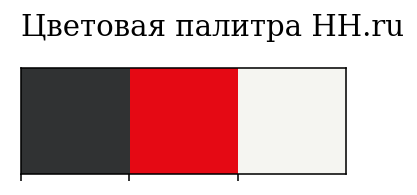

In [25]:
# Palette
sns.palplot(['#303233', '#e50914','#f5f5f1'])

plt.title("Цветовая палитра HH.ru",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

# Построить график компаний с самым большим кол-вом вакансий

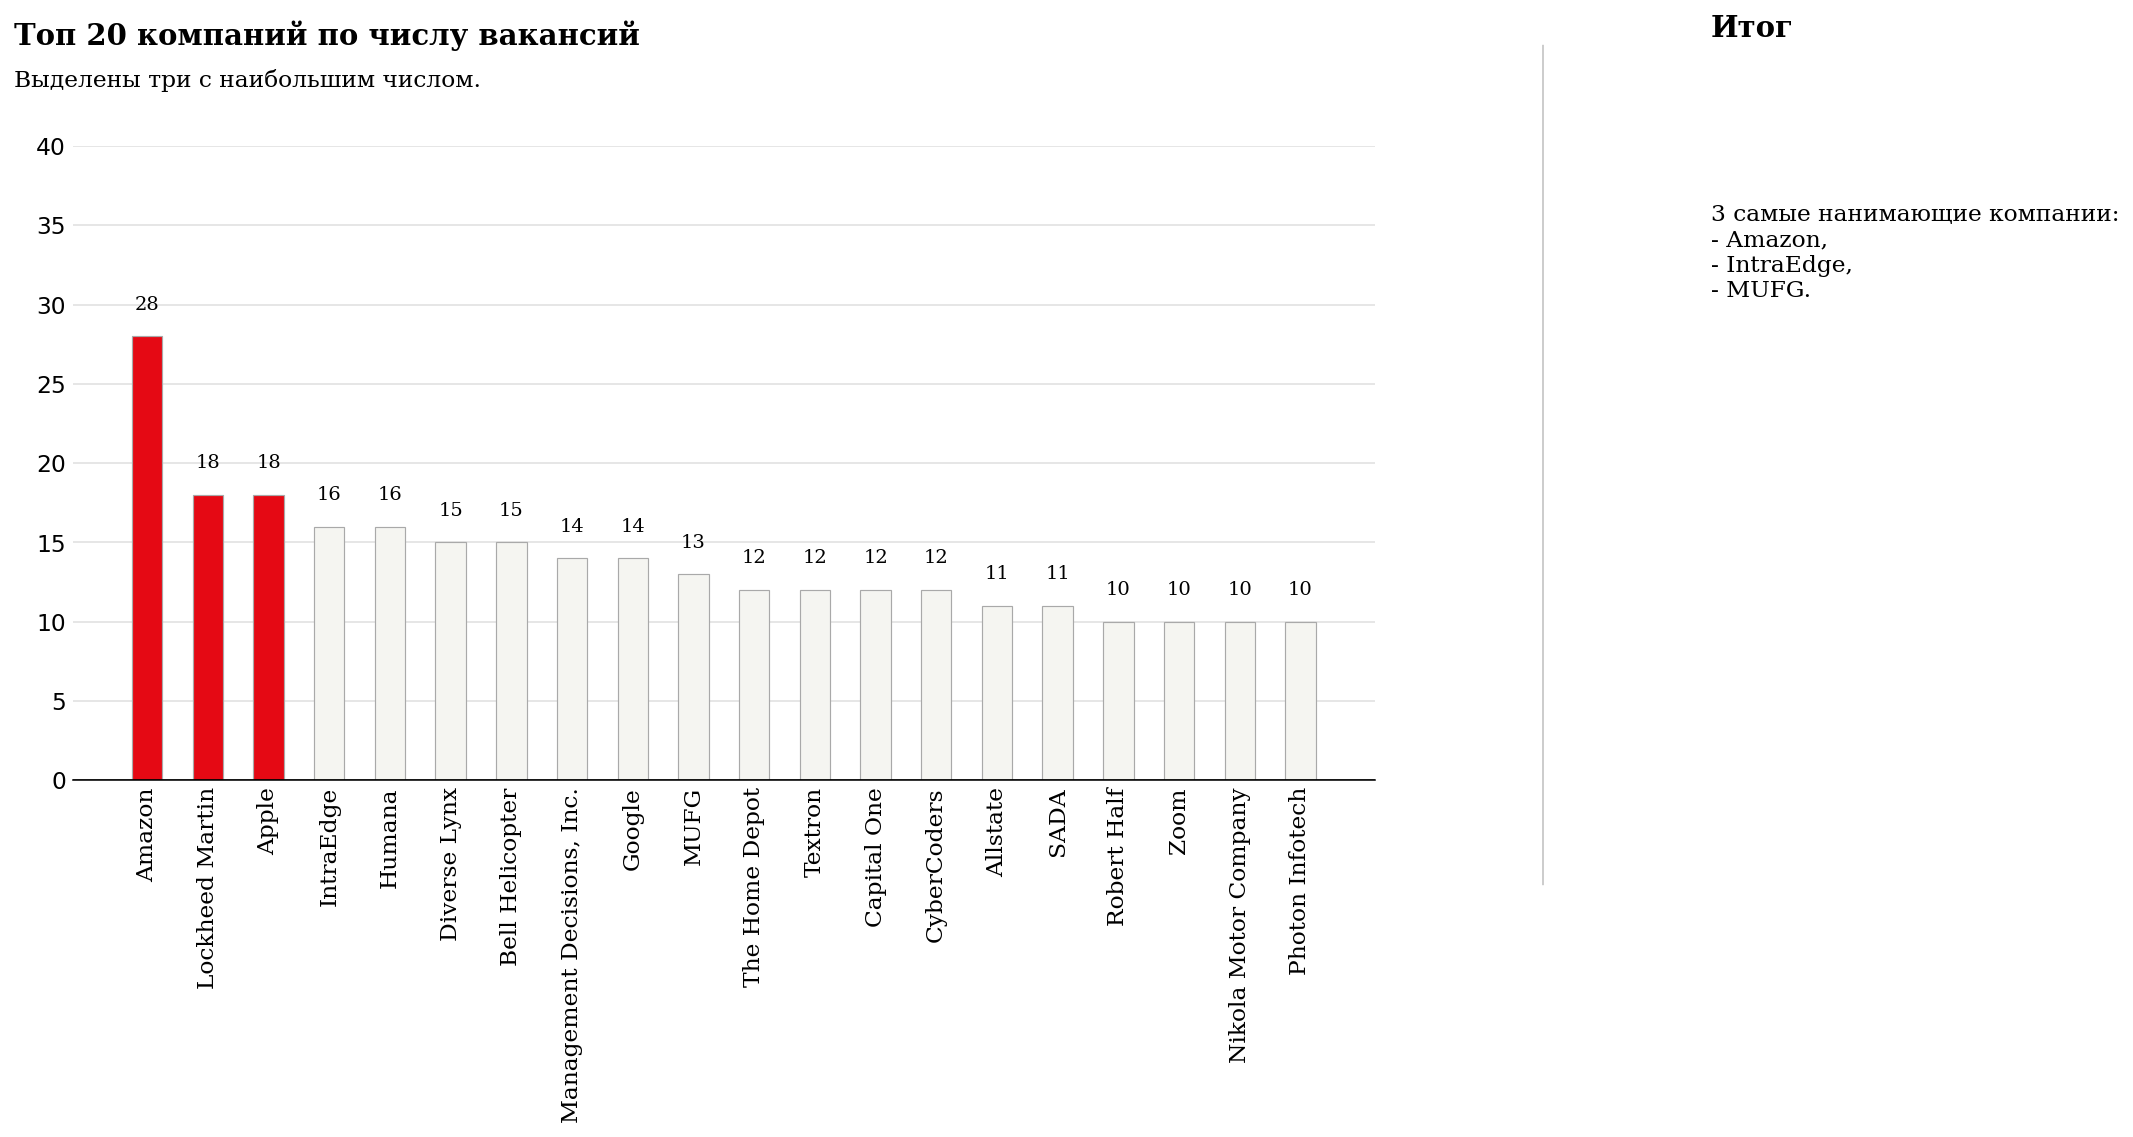

In [26]:
# удалим рейтинги в названиях
df['Company Name'] = df['Company Name'].apply(lambda x: x.split("\n")[0])

# группировка и ранжирование
df['count'] = 1
data = df.groupby('Company Name')['count'].sum().sort_values(ascending=False)[:20]

# Plot

color_map = ['#f5f5f1' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] =  '#e50914' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 2), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Топ 20 компаний по числу вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три с наибольшим числом.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
3 самые нанимающие компании:
- Amazon,
- IntraEdge,
- MUFG.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 45, 5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=90)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Построить график самых популярный названий в вакансиях

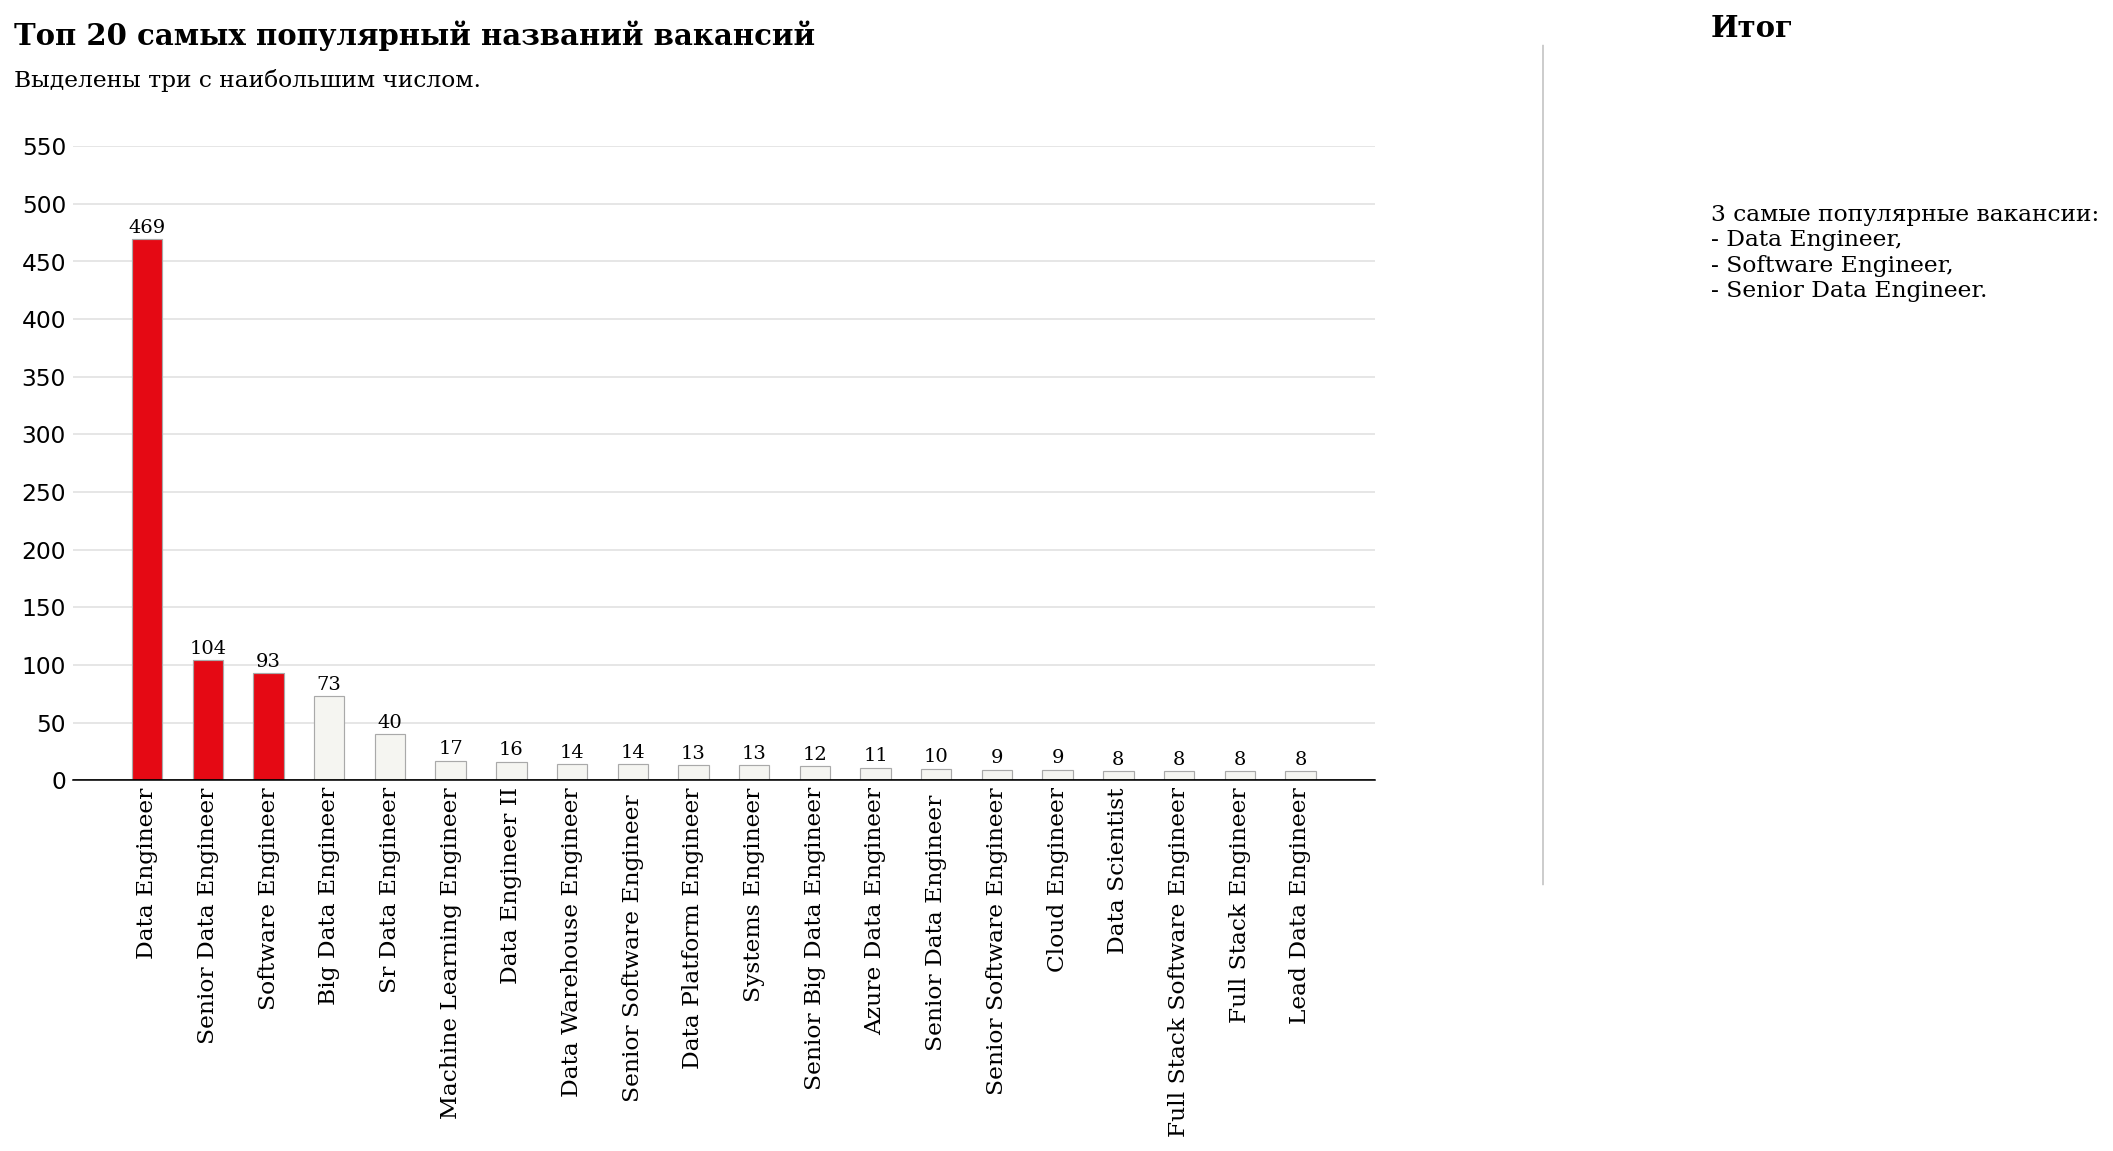

In [27]:
# Сделаем вспомогательную колонку с первыми тремя словаим в вакансии
df['Short Job Name'] = df['Job Title']\
      .apply(lambda x: " ".join(''.join(ch for ch in x if (ch.isalnum() or ch == ' ')).split(" ")[0:4]))

# группировка и ранжирование
df['count'] = 1
data = df.groupby('Short Job Name')['count'].sum().sort_values(ascending=False)[:20]

# Plot

color_map = ['#f5f5f1' for _ in range(20)]
color_map[0] = color_map[1] = color_map[2] =  '#e50914' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 10), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Топ 20 самых популярный названий вакансий', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три с наибольшим числом.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
3 самые популярные вакансии:
- Data Engineer,
- Software Engineer,
- Senior Data Engineer.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 600, 50) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=90)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму

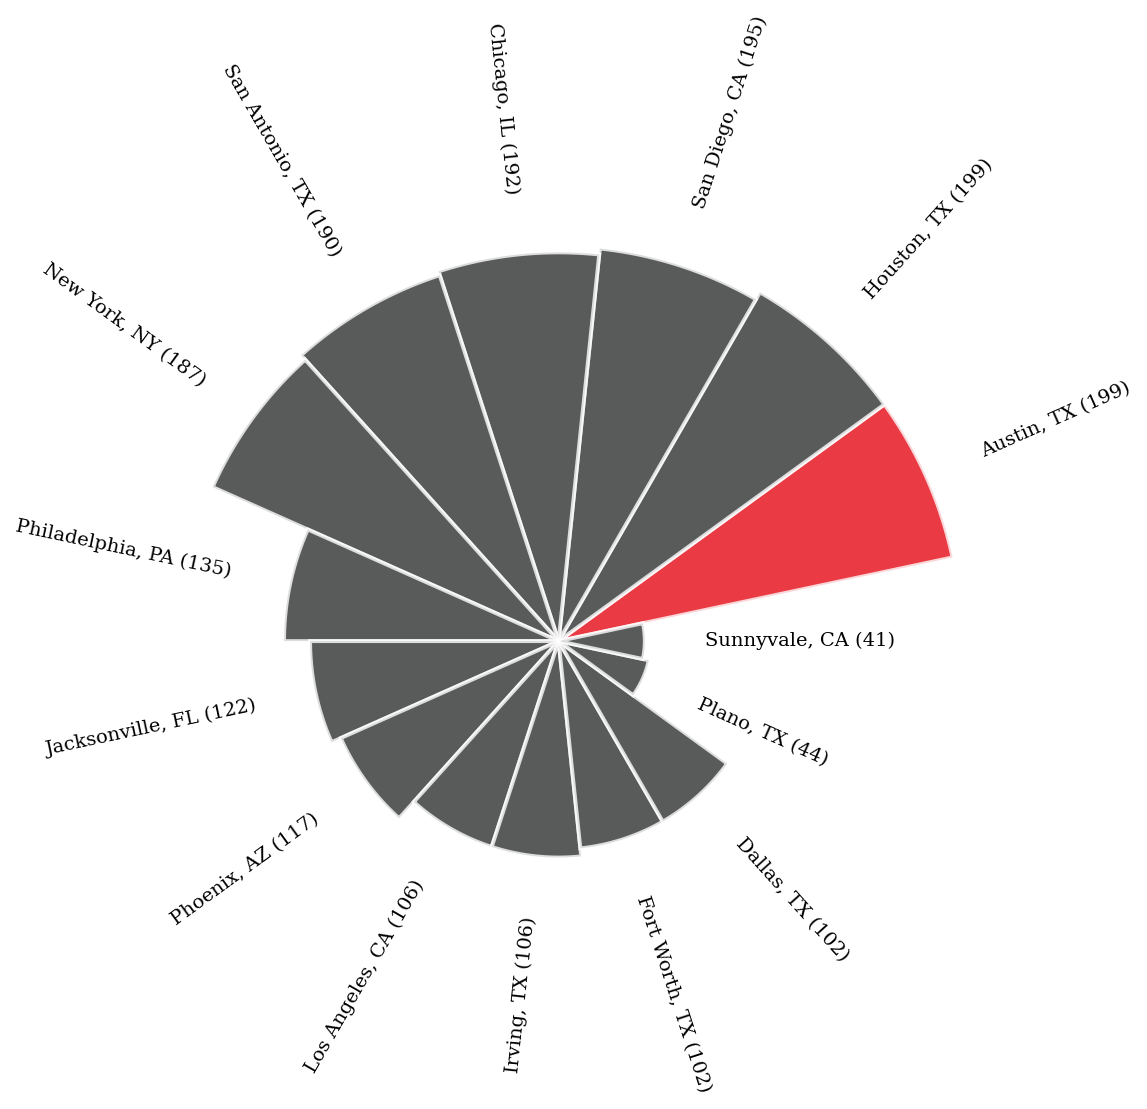

In [28]:
df['count'] = 1
df_polar = df.groupby('Location')['count'].sum().sort_values(ascending=False)[:15]

color_map = ['#303233' for _ in range(15)]
color_map[0] = '#e50914' # color highlight


# initialize the figure
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 30
lowerLimit = 1
labelPadding = 30

# Compute max and min in the dataset
max = df_polar[0]

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_polar + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_polar.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_polar.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color=color_map,alpha=0.8
)

# Add labels
for bar, angle, height, label, lab_value in zip(bars,angles, heights, df_polar.index, df_polar):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=f"{label} ({lab_value})", 
        ha=alignment, fontsize=10,fontfamily='serif',
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

# Построить график популярности по колонке Type of ownership, относительно численности вакансий

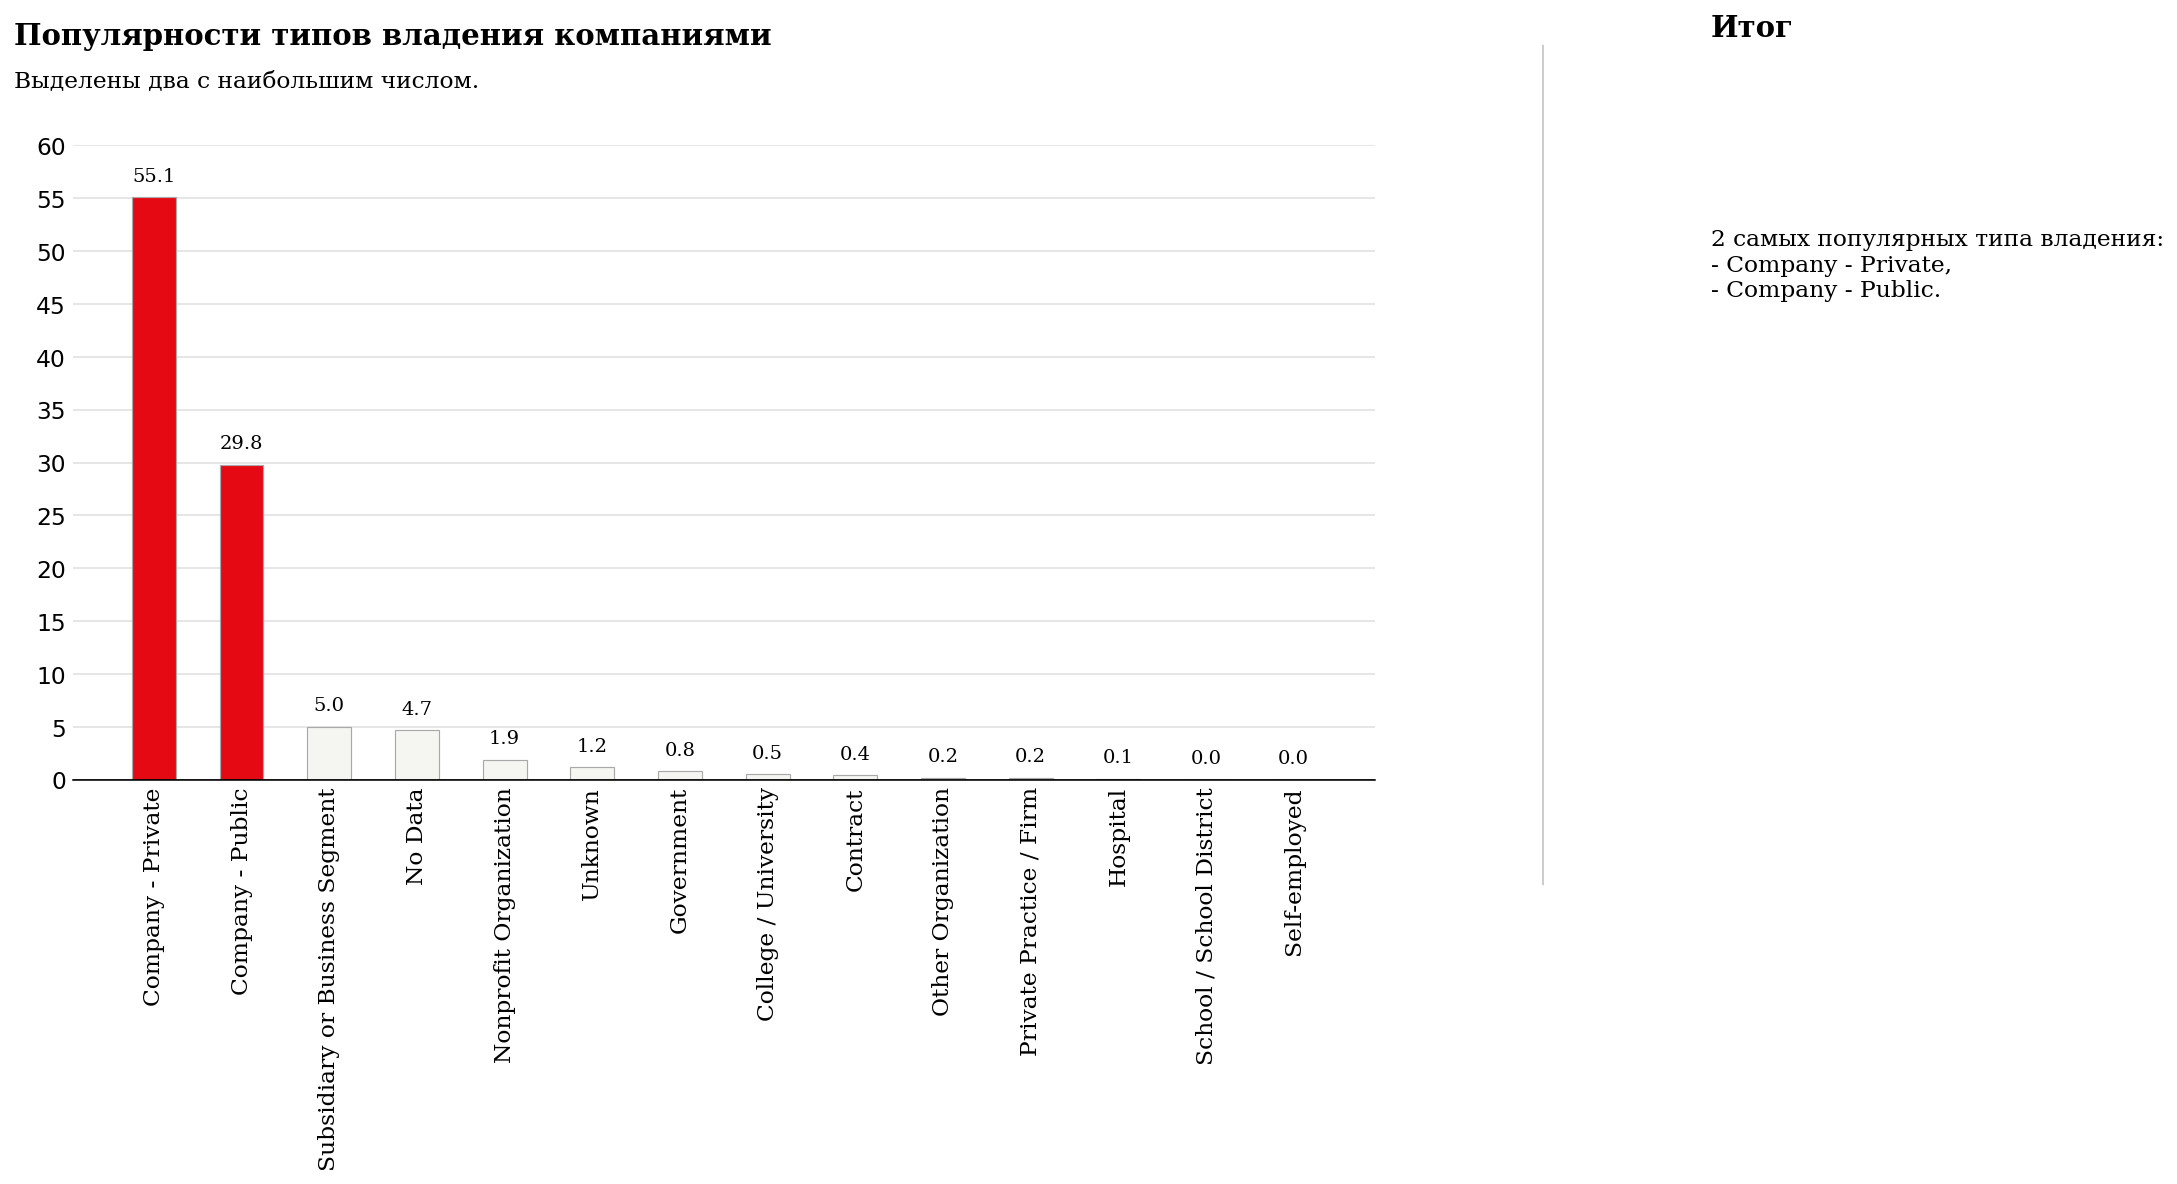

In [29]:
# группировка и ранжирование
df['Type of ownership'].replace("-1", 'No Data',inplace  = True)
df['count'] = 1
total = df['count'].sum()

data = df.groupby('Type of ownership')['count'].sum().apply(lambda x: round(x / total * 100, 1)).sort_values(ascending=False)

# Plot

color_map = ['#f5f5f1' for _ in range(100)]
color_map[0] = color_map[1] = '#e50914' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 2), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Популярности типов владения компаниями', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены два с наибольшим числом.', fontsize=12, fontweight='light', fontfamily='serif')

fig.text(1.1, 1.01, 'Итог', fontsize=15, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.67, '''
2 самых популярных типа владения:
- Company - Private,
- Company - Public.
'''
         , fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 65, 5) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=90)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Построить график популярности по секторам работы

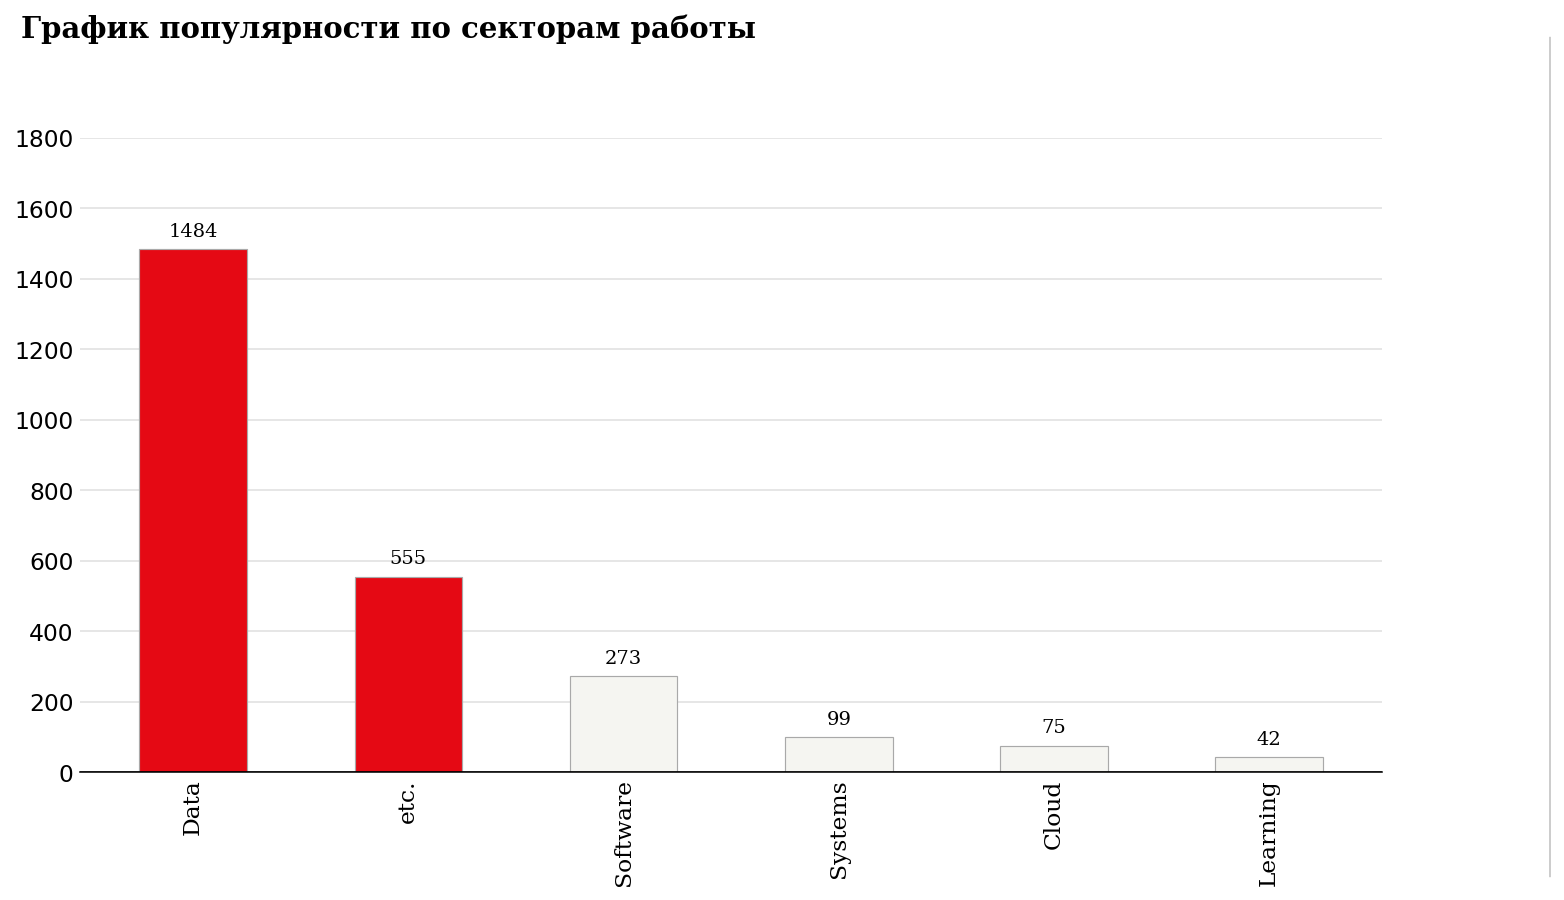

In [30]:
# Сделаем вспомогательную колонку
g = [
    "Systems",
    "Learning",
    "Cloud",
    "Data",
    "Software",
    "etc."
]

def g_sector(value):
  if g[0] in value:
    return g[0]
  elif g[1] in value:
    return g[1]
  elif g[2] in value:
    return g[2]
  if g[3] in value:
    return g[3]
  if g[4] in value:
    return g[4]
  return "etc."

df["Sector"] = df['Job Title'].apply(g_sector)

# группировка и ранжирование
df['count'] = 1
data = df.groupby('Sector')['count'].sum().sort_values(ascending=False)

# Plot

color_map = ['#f5f5f1' for _ in range(100)]
color_map[0] = color_map[1] = '#e50914' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 50), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'График популярности по секторам работы', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1900, 200) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=90)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()



# Построить график используя сектора работы и средний уровень зарплат в них

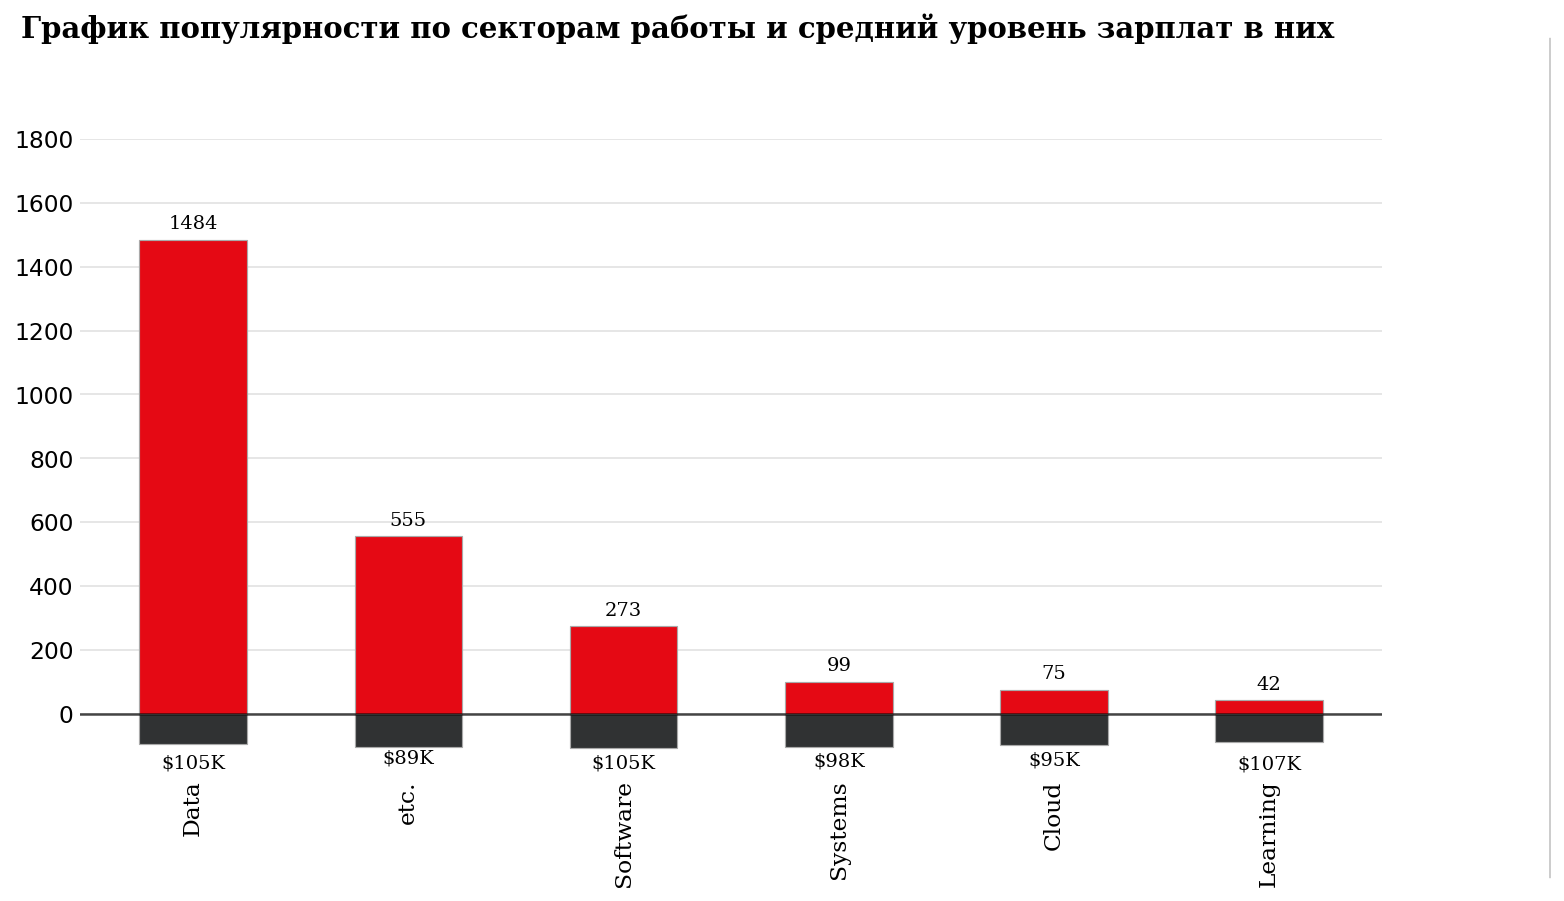

In [31]:
# Сделаем вспомогательную колонку

def mean_salary(value):
  salaries = value.split("(")[0]
  salaries = salaries.split("-")
  s1 = salaries[0].replace("$", "").replace("K", "")
  s2 = salaries[1].replace("$", "").replace("K", "")
  return (int(s1) + int(s2)) / 2

df["Mean Salary"] = df['Salary Estimate'].apply(lambda x: mean_salary(x))

# Сделаем вспомогательную колонку
g = [
    "Systems",
    "Learning",
    "Cloud",
    "Data",
    "Software",
    "etc."
]

def g_sector(value):
  if g[0] in value:
    return g[0]
  elif g[1] in value:
    return g[1]
  elif g[2] in value:
    return g[2]
  if g[3] in value:
    return g[3]
  if g[4] in value:
    return g[4]
  return "etc."

df["Sector"] = df['Job Title'].apply(g_sector)

# группировка и ранжирование
data = df.groupby('Sector')['count'].sum().sort_values(ascending=False)
data2 = df.groupby('Sector')['Mean Salary'].mean()

# Plot

color_map = ['#e50914' for _ in range(100)]
color_map2 = ['#303233' for _ in range(100)]

fig, ax = plt.subplots(1,1, figsize=(12, 6))


ax.bar(data.index, -data2, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map2)

ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)


#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 50), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')
    
#annotations
for i in data.index:
    ax.annotate(f"${round(data2[i])}K", 
                   xy=(i, -data2[i] - 50), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'График популярности по секторам работы и средний уровень зарплат в них', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 1900, 200) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=90)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()



# Построить гистограмму распределения рейтинга компаний

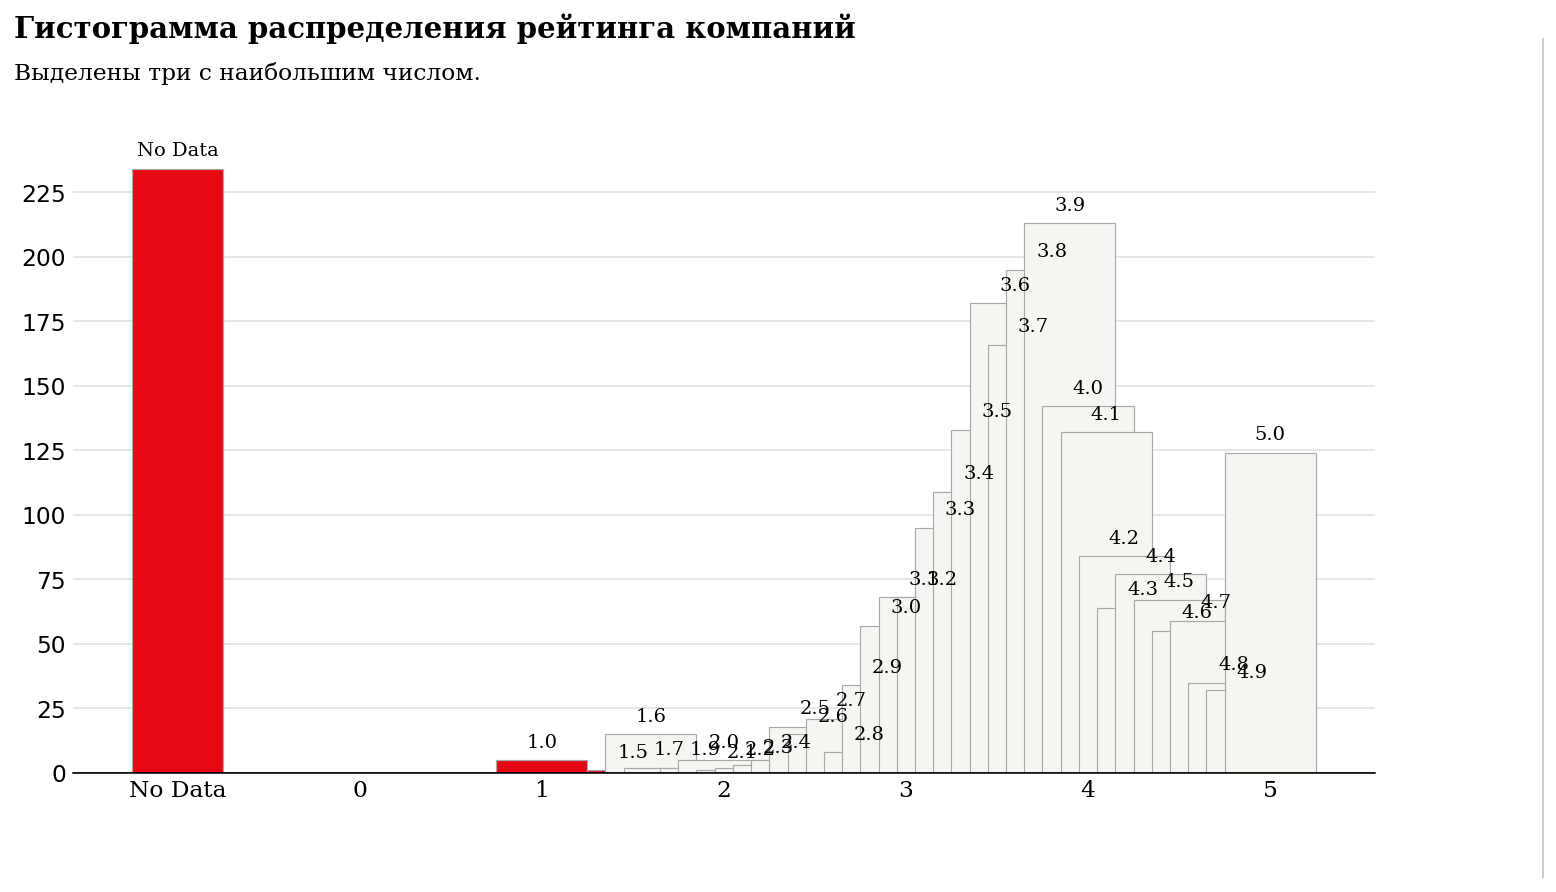

In [40]:
# удалим рейтинги в названиях
df['Company Name'] = df['Company Name'].apply(lambda x: x.split("\n")[0])

# группировка и ранжирование
data = df.groupby('Rating')['count'].sum()

# Plot

color_map = ['#f5f5f1' for _ in range(100)]
color_map[0] = color_map[1] = color_map[2] =  '#e50914' # color highlight

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)

#annotations
for i in data.index:
    ax.annotate(f"{i}" if i > 0 else "No Data", 
                   xy=(i, data[i] + 7), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(["No Data", 0, 1, 2, 3, 4, 5], fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Гистограмма распределения рейтинга компаний', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 0.95, 'Выделены три с наибольшим числом.', fontsize=12, fontweight='light', fontfamily='serif')

ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 250, 25) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(ticks=[-1, 0, 1, 2, 3, 4, 5], labels=["No Data", 0, 1, 2, 3, 4, 5])


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Построить график средних зарплат по популярным компаниям

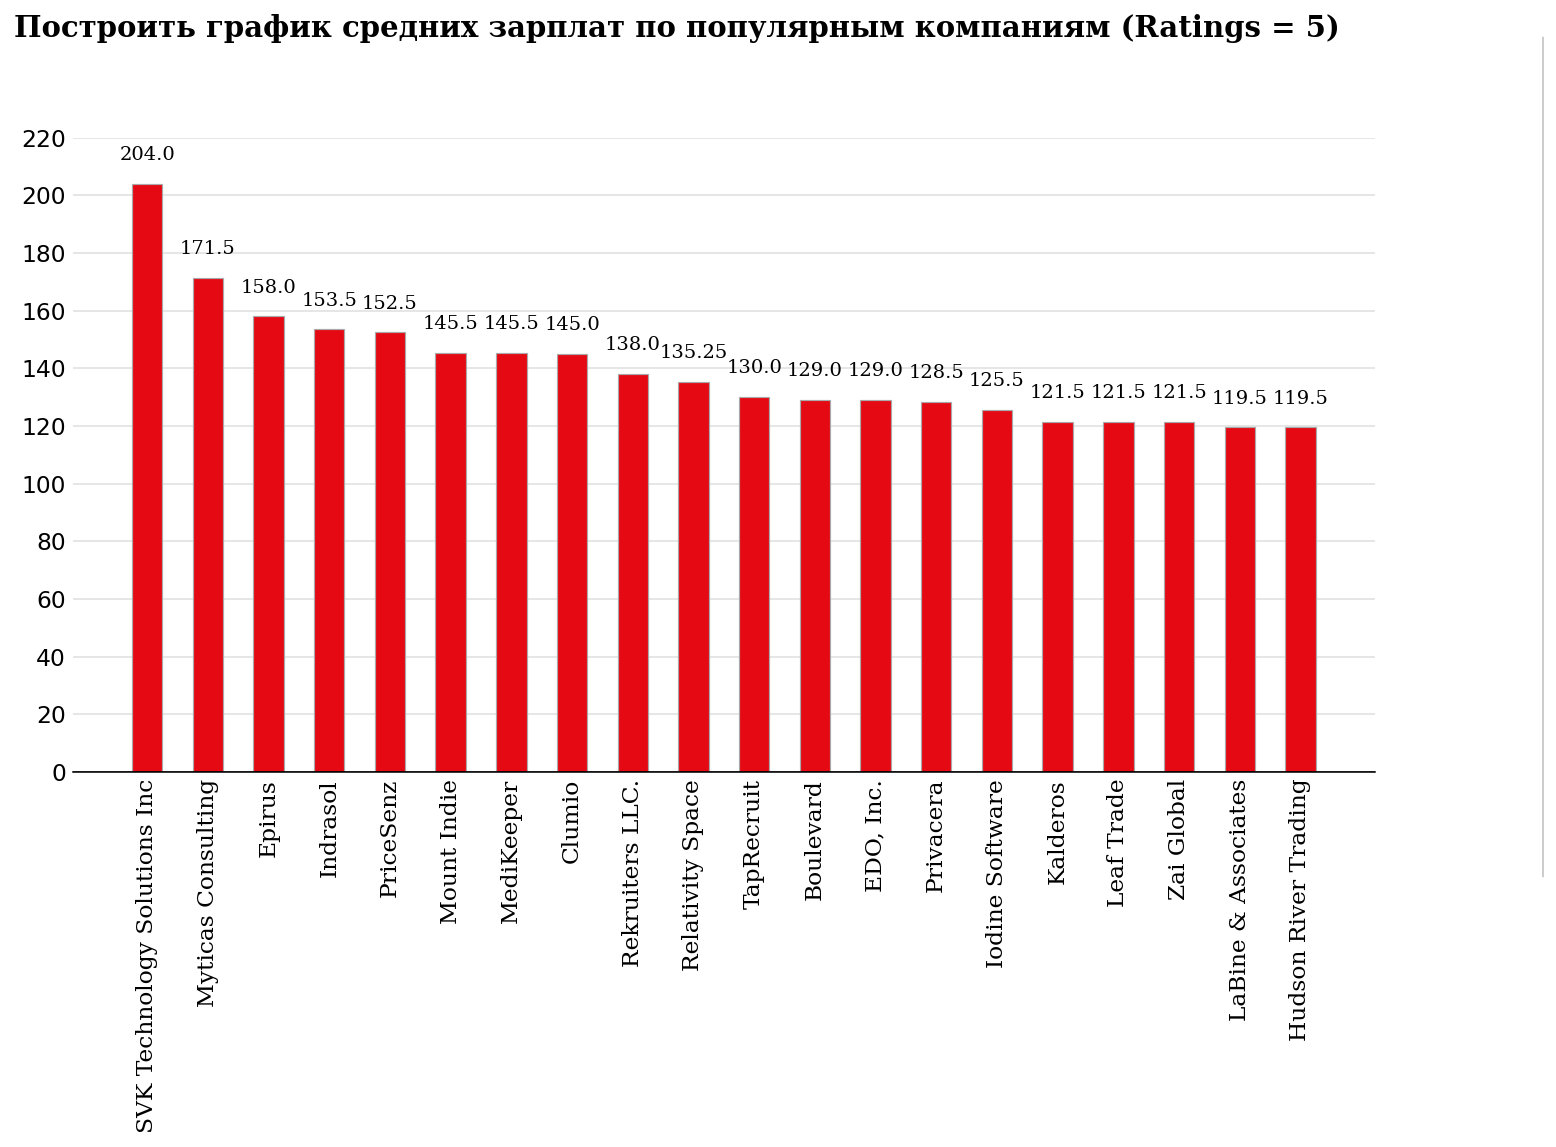

In [51]:
# Сделаем вспомогательную колонку

def mean_salary(value):
  salaries = value.split("(")[0]
  salaries = salaries.split("-")
  s1 = salaries[0].replace("$", "").replace("K", "")
  s2 = salaries[1].replace("$", "").replace("K", "")
  return (int(s1) + int(s2)) / 2

df["Mean Salary"] = df['Salary Estimate'].apply(lambda x: mean_salary(x))

# удалим рейтинги в названиях
df['Company Name'] = df['Company Name'].apply(lambda x: x.split("\n")[0])


# группировка и ранжирование
data = df.where(df['Rating'] == 5).groupby('Company Name')['Mean Salary'].mean().sort_values(ascending=False)[:20]

# Plot

color_map = ['#e50914' for _ in range(100)]
color_map2 = ['#303233' for _ in range(100)]

fig, ax = plt.subplots(1,1, figsize=(12, 6))

ax.bar(data.index, data, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6,color=color_map)


#annotations
for i in data.index:
    ax.annotate(f"{data[i]}", 
                   xy=(i, data[i] + 10), #i like to change this to roughly 5% of the highest cat
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

# Remove border from plot

for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Tick labels

ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)

# Title and sub-title

fig.text(0.09, 1, 'Построить график средних зарплат по популярным компаниям (Ratings = 5)', fontsize=15, fontweight='bold', fontfamily='serif')
ax.grid(axis='y', linestyle='-', alpha=0.4)   

grid_y_ticks = np.arange(0, 230, 20) # y ticks, min, max, then step
ax.set_yticks(grid_y_ticks)
ax.set_axisbelow(True)

#Axis labels
    
# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.tick_params(axis='both', which='major', labelsize=12)
plt.xticks(rotation=90)


import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

# Построить описаний вакансий облако тегов, исследовать самые популярные слова

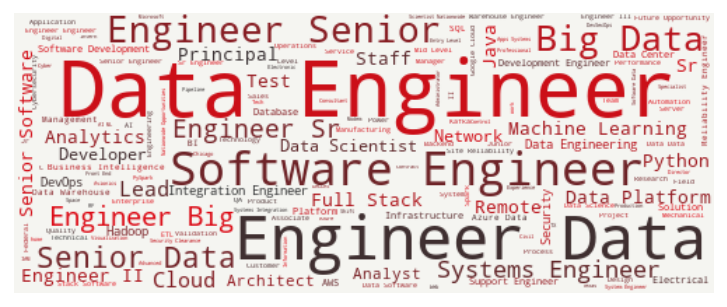

In [53]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib

# Custom colour map based on Netflix palette
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#303233', '#e50914'])

text = str(list(df['Job Title'])).replace(',', '').replace('(', '').replace("'", '').replace(')', '').replace('.', '').replace('-', ' ')

wordcloud = WordCloud(background_color = '#f5f5f1', width = 500,  height = 200,colormap=cmap, max_words = 150).generate(text)

plt.figure( figsize=(5,5))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()